# Heart Disease

In this project, we want to specify the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression. Where World Health Organization has estimated 12 million deaths occur worldwide, every year due to heart diseases. And the early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high-risk patients and in turn reduce complications and deaths due to heart disease.


The data contains the following columns:

Demographic:

1.	Sex: male or female (Nominal)

2.	Age: Age of the patient; (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral

3.	Current Smoker: whether or not the patient is a current smoker (Nominal)

4.	Cigs Per Day: the number of cigarettes that the person smoked on average in one day. (can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

Medical( history):

5.	BP Meds: whether or not the patient was on blood pressure medication (Nominal) 

6.	Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

7.	Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

8.	Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current):

9.	Tot Chol: total cholesterol level (Continuous)

10.	Sys BP: systolic blood pressure (Continuous)

11.	Dia BP: diastolic blood pressure (Continuous)

12.	BMI: Body Mass Index (Continuous)

13.	Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

14.	Glucose: glucose level (Continuous)

Predict variable (desired target):

15.	TenYearCHD: 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

**Let's get started!**

## Import Libraries

In [ ]:
# loading dataset
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sn
# visualisation
import matplotlib.pyplot as plt
%matplotlib inline
# data splitting
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import scipy.stats as st
from collections import Counter
from statsmodels.tools import add_constant as add_constant
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# ensembling
from mlxtend.classifier import StackingCVClassifier



## Check out the Data

In [3]:
HeartDisease_dataset= pd.read_csv('predict heart disease.csv')

In [4]:
HeartDisease_dataset.drop(['education'],axis=1,inplace=True)
HeartDisease_dataset.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
HeartDisease_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [6]:
HeartDisease_dataset.describe() 

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
HeartDisease_dataset.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
HeartDisease_dataset.rename(columns={'male':'Sex_male'},inplace=True)

## Missing values

In [13]:
HeartDisease_dataset.isnull().sum()

Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [14]:
count=0
for i in HeartDisease_dataset.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(HeartDisease_dataset.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [15]:
HeartDisease_dataset.dropna(axis=0,inplace=True)

## EDA

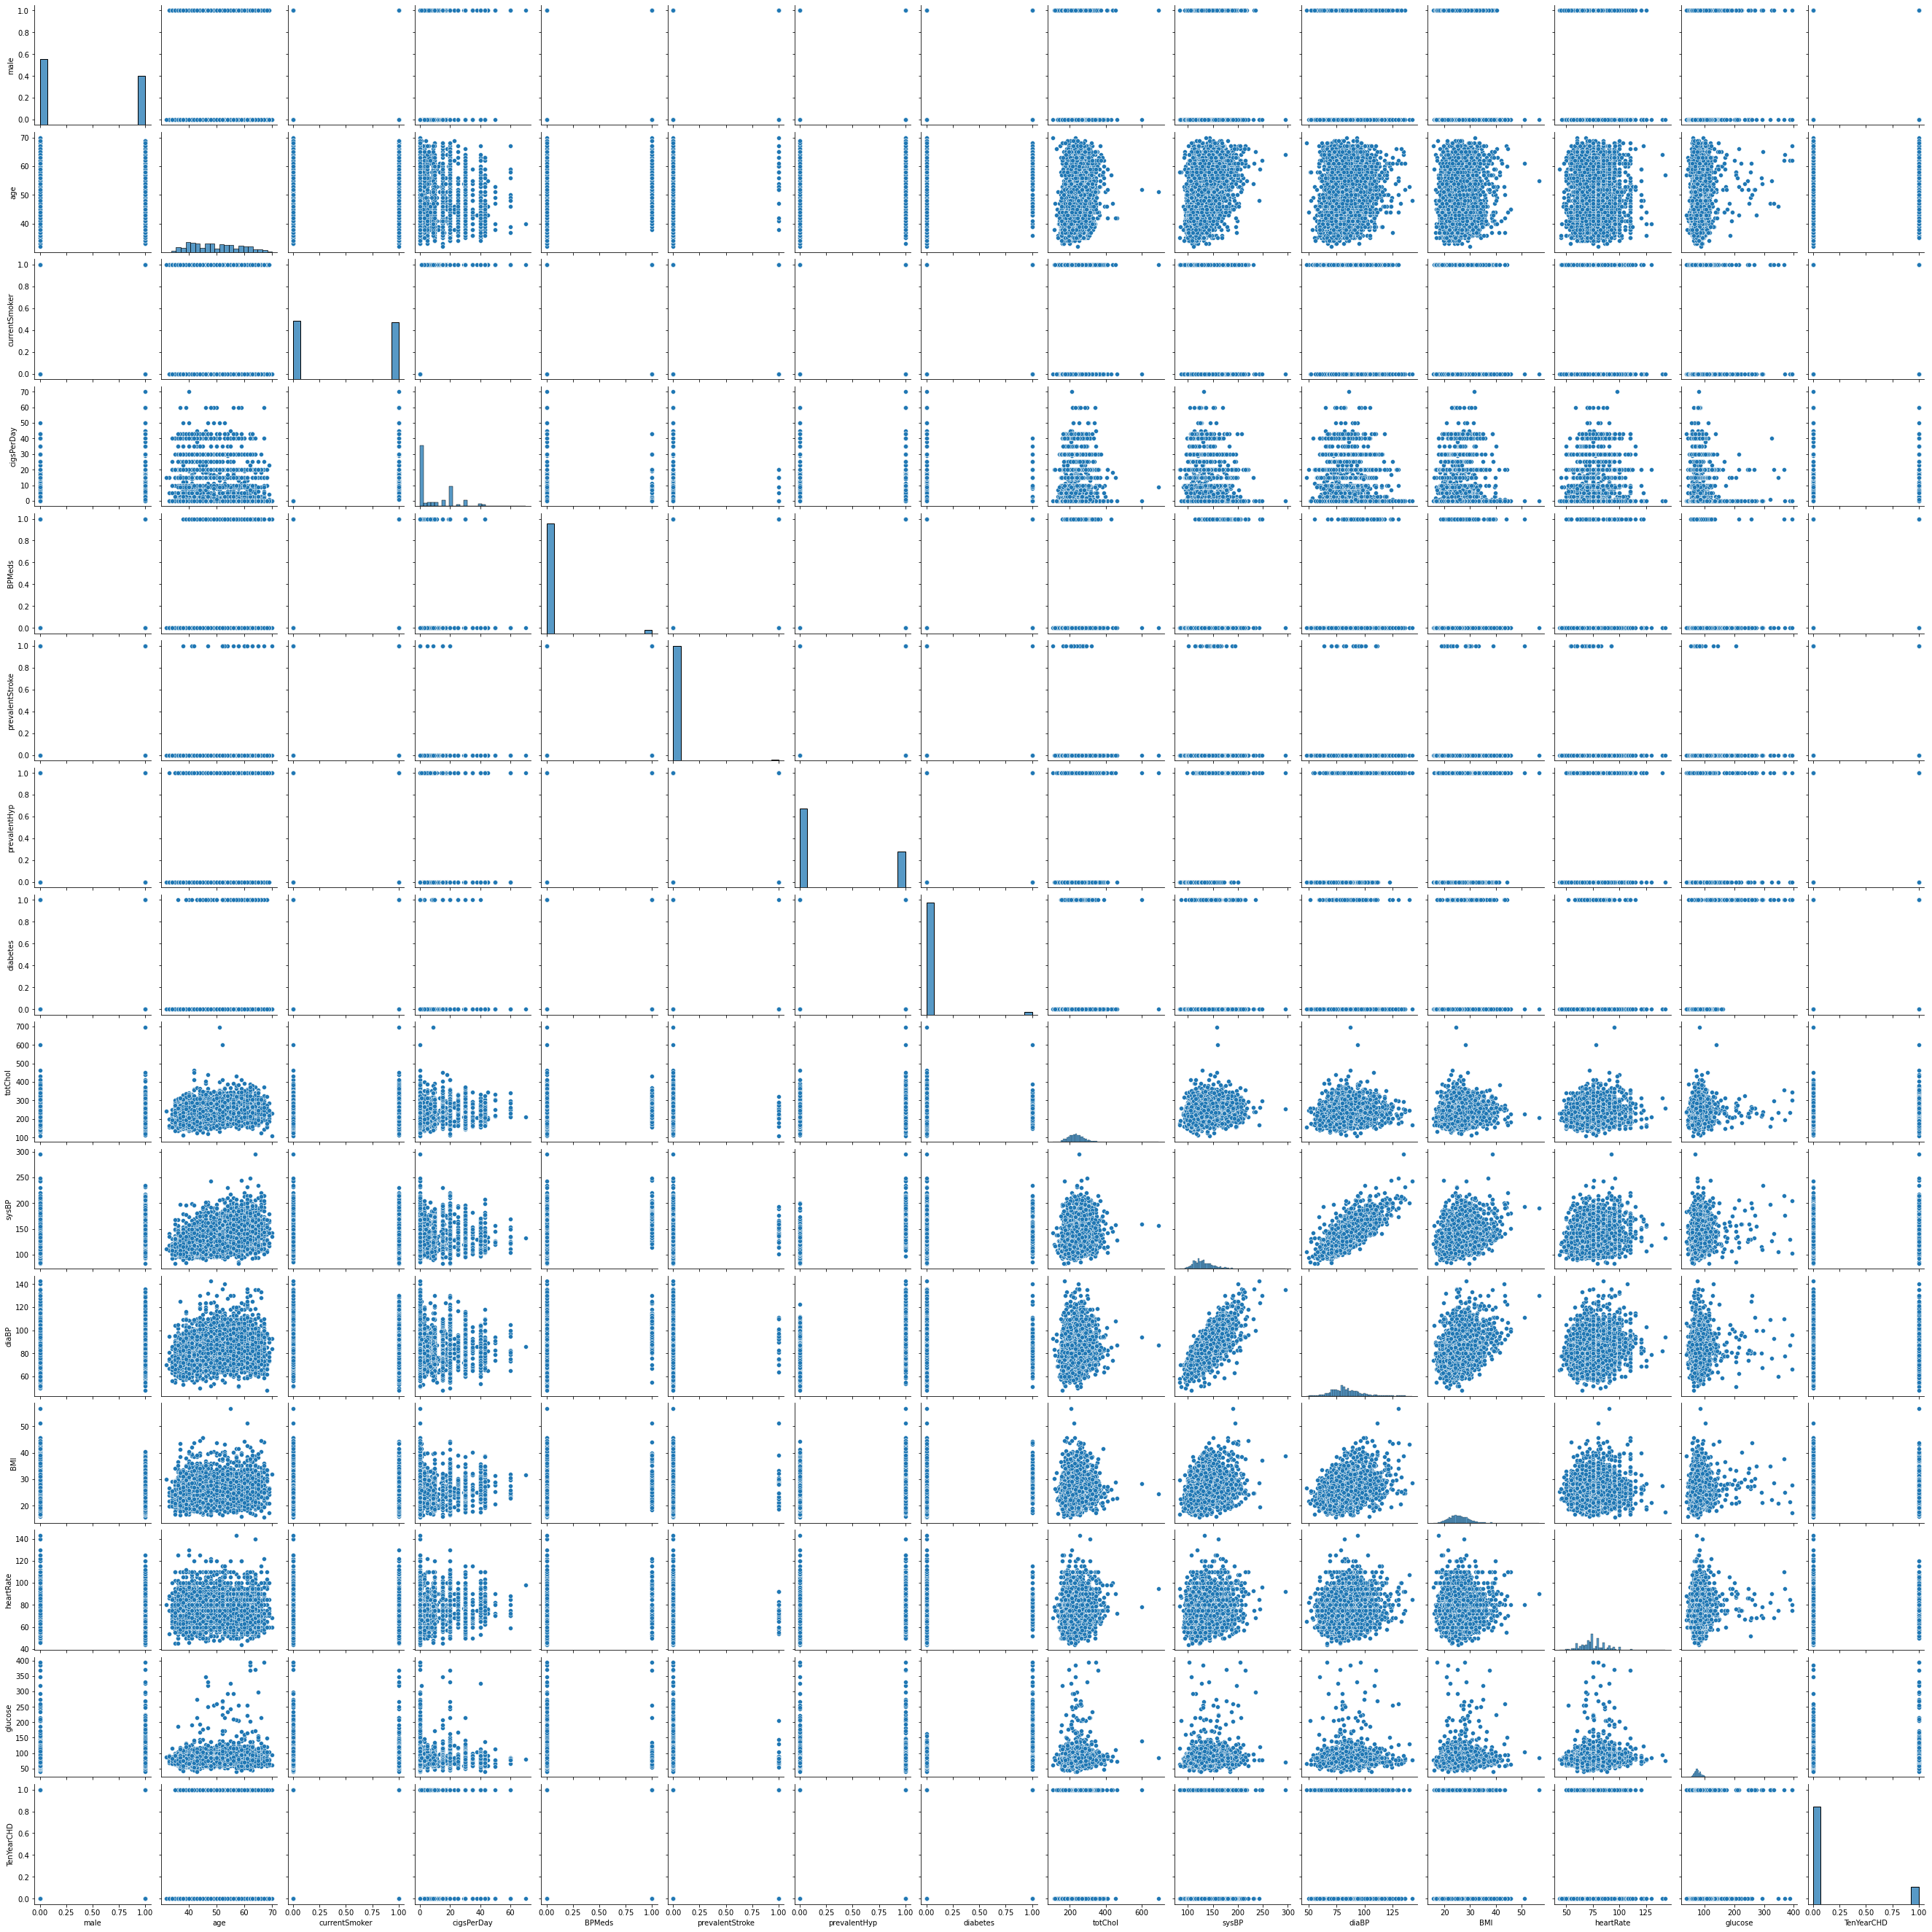

In [8]:
sns.pairplot(HeartDisease_dataset)

<AxesSubplot:>

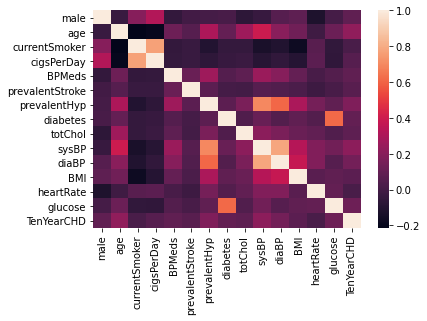

In [9]:
sns.heatmap(HeartDisease_dataset.corr())

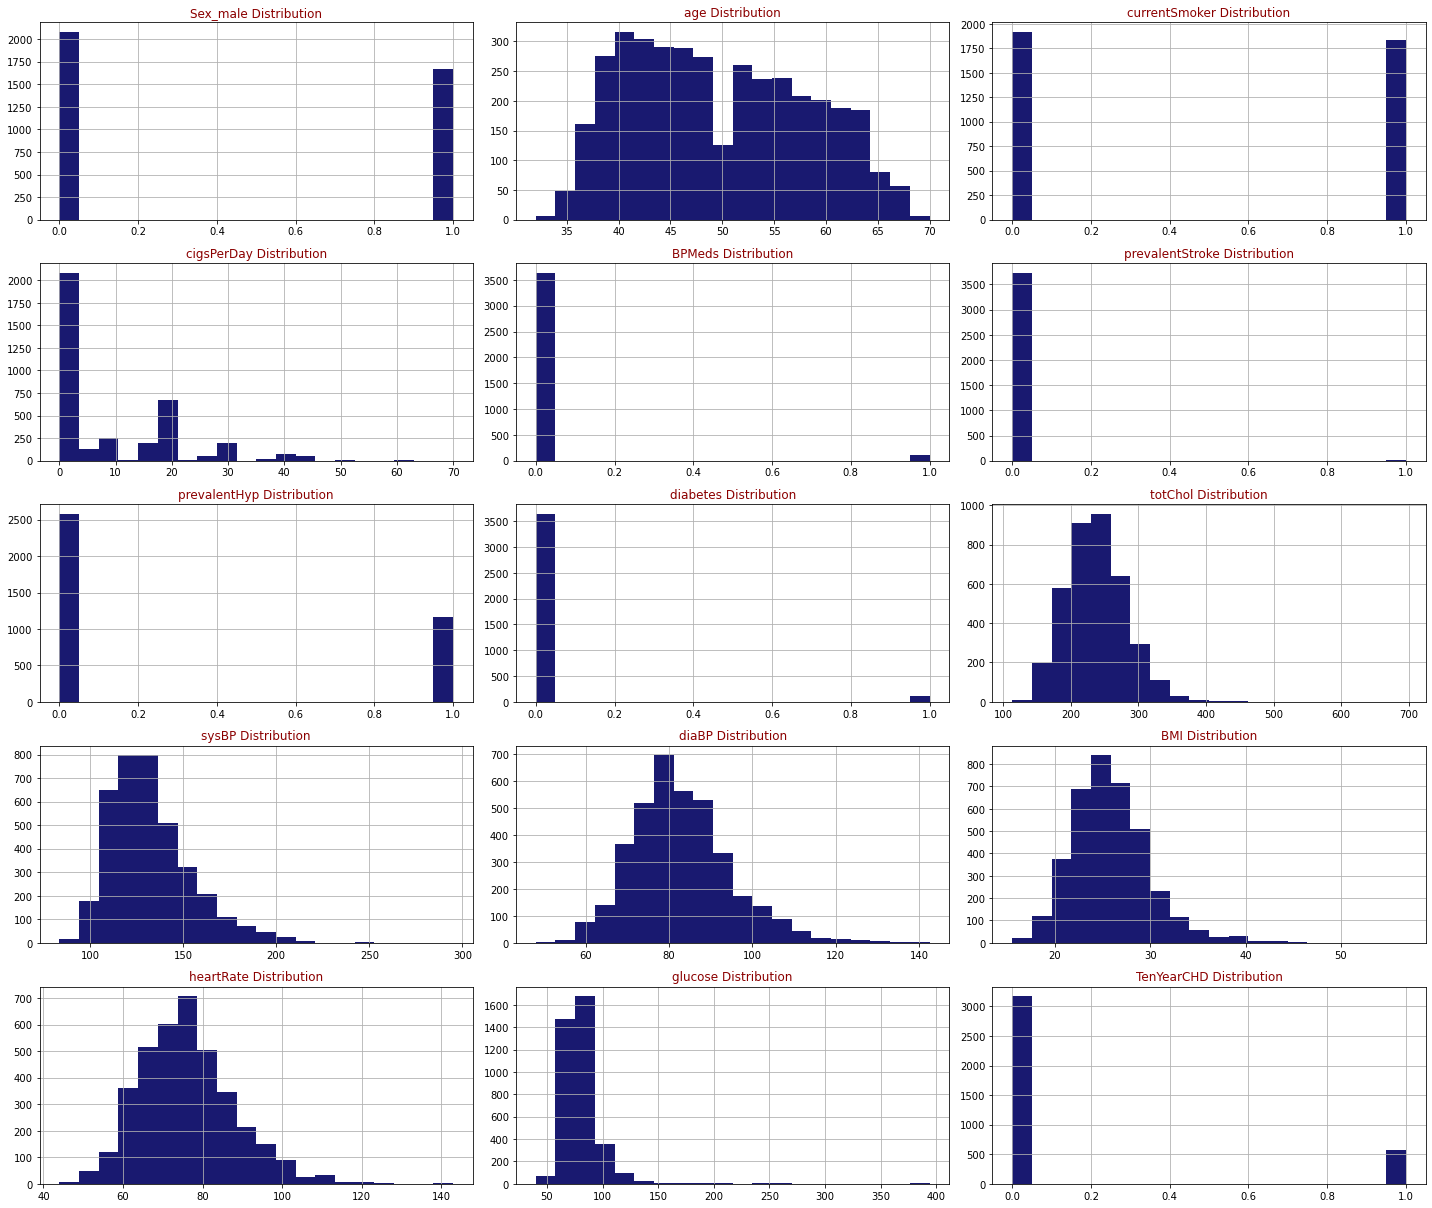

In [16]:
#Exploratory Analysis
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(HeartDisease_dataset,HeartDisease_dataset.columns,6,3)

In [50]:
HeartDisease_dataset.Sex_male.value_counts()

0    2080
1    1669
Name: Sex_male, dtype: int64

<AxesSubplot:xlabel='Sex_male', ylabel='count'>

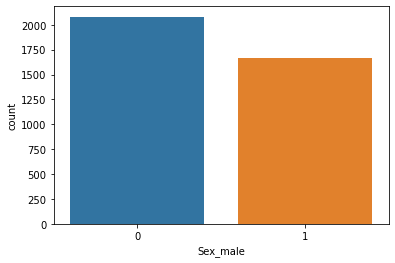

In [17]:
sn.countplot(x = 'Sex_male',data = HeartDisease_dataset)

There are 2080 male patients and 1669 female patients with risk of heart disease.

In [20]:
HeartDisease_dataset.TenYearCHD.value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

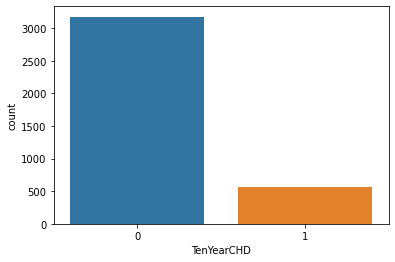

In [21]:
sn.countplot(x = 'TenYearCHD',data = HeartDisease_dataset)

There are 3177 patients with no heart disease and 572 patients with risk of heart disease.

# Model prepration


In [25]:
y = HeartDisease_dataset["TenYearCHD"]
X = HeartDisease_dataset.drop('TenYearCHD',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem

In [26]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 2536, 1: 463})

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.

In [44]:
HeartDisease_dataset_constant = add_constant(HeartDisease_dataset)

In [45]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=HeartDisease_dataset_constant.columns[:-1]
model=sm.Logit(HeartDisease_dataset.TenYearCHD,HeartDisease_dataset_constant[cols])
#result=model.fit()
#result.summary()

The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of heart disease. Backward elemination approach is used here to remove those attributes with highest P value one at a time follwed by running the regression repeatedly until all attributes have P Values less than 0.05.

# Feature Selection: Backward elemination (P-value approach)

In [46]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(HeartDisease_dataset_constant,HeartDisease_dataset.TenYearCHD,cols)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3742
Method:                           MLE   Df Model:                            6
Date:                Mon, 18 Oct 2021   Pseudo R-squ.:                  0.1148
Time:                        21:19:20   Log-Likelihood:                -1417.6
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.548e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1211      0.468    -19.491      0.000     -10.038      -8.204
Sex_male       0.5813      0.105      5.521      0.000       0.375       0.788
age            0.0654      0.006     10.330      0.000       0.053       0.078
cigsPerDay     0.0197      0.004      4.803      0.000       0.012       0.028
totChol        0.0023      0.001      2.099      0.036       0.000       0.004
sysBP          0.0174      0.002      8.166      0.000       0.013       0.022
glucose        0.0076      0.002      4.573      0.000       0.004       0.011
==============================================================================
"""

# Interpreting the results: Odds Ratio, Confidence Intervals and P Values

In [47]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000044       0.000274    0.000109   0.000
Sex_male        1.454877       2.198166    1.788313   0.000
age             1.054409       1.080897    1.067571   0.000
cigsPerDay      1.011730       1.028128    1.019896   0.000
totChol         1.000150       1.004386    1.002266   0.036
sysBP           1.013299       1.021791    1.017536   0.000
glucose         1.004343       1.010895    1.007614   0.000


- This fitted model shows that, holding all other features constant, the odds of getting diagnosed with heart disease for males (sex_male = 1)over that of females (sex_male = 0) is exp(0.5815) = 1.7883137. In terms of percent change, we can say that the odds for males are 78.8% higher than the odds for females.


- We will see 7% increase in the odds of getting diagnosed with CDH for a one year increase in age since exp(0.0655) = 1.067644.

- There is a 1.7% increase in odds for every unit increase in systolic Blood Pressure.

- We can see with every extra cigarette one smokes thers is a 2% increase in the odds of CDH.

- For Total cholosterol level and glucose level there is no significant change.

# ML models
## Here I take different machine learning algorithm and try  find algorithm which predict accurately. 

 1-Logistic Regression
 
 2-Naive Bayes
 
 3-Random Forest Classifier
 
 4-Extreme Gradient Boost
 
 5-K-Nearest Neighbour
 
 6-Decision Tree
 
 7-Support Vector Machine

In [28]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[635   6]
 [104   5]]


Accuracy of Logistic Regression: 85.33333333333334 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       641
           1       0.45      0.05      0.08       109

    accuracy                           0.85       750
   macro avg       0.66      0.52      0.50       750
weighted avg       0.80      0.85      0.80       750



In [29]:

m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[595  46]
 [ 91  18]]


Accuracy of Naive Bayes model: 81.73333333333333 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       641
           1       0.28      0.17      0.21       109

    accuracy                           0.82       750
   macro avg       0.57      0.55      0.55       750
weighted avg       0.78      0.82      0.80       750



In [30]:

m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[639   2]
 [109   0]]


Accuracy of Random Forest: 85.2 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       641
           1       0.00      0.00      0.00       109

    accuracy                           0.85       750
   macro avg       0.43      0.50      0.46       750
weighted avg       0.73      0.85      0.79       750



In [31]:
!pip install xgboost
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

[21:06:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Asalah zarban\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


confussion matrix
[[641   0]
 [109   0]]


Accuracy of Extreme Gradient Boost: 85.46666666666667 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       641
           1       0.00      0.00      0.00       109

    accuracy                           0.85       750
   macro avg       0.43      0.50      0.46       750
weighted avg       0.73      0.85      0.79       750



C:\Users\Asalah zarban\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asalah zarban\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asalah zarban\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:

m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[632   9]
 [107   2]]


Accuracy of K-NeighborsClassifier: 84.53333333333333 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       641
           1       0.18      0.02      0.03       109

    accuracy                           0.85       750
   macro avg       0.52      0.50      0.47       750
weighted avg       0.76      0.85      0.79       750



In [33]:

m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[628  13]
 [102   7]]


Accuracy of DecisionTreeClassifier: 84.66666666666667 

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       641
           1       0.35      0.06      0.11       109

    accuracy                           0.85       750
   macro avg       0.61      0.52      0.51       750
weighted avg       0.79      0.85      0.80       750



In [34]:

m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[631  10]
 [104   5]]


Accuracy of Support Vector Classifier: 84.8 

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       641
           1       0.33      0.05      0.08       109

    accuracy                           0.85       750
   macro avg       0.60      0.52      0.50       750
weighted avg       0.78      0.85      0.80       750



<ipython-input-35-ce60f79a3348>:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')


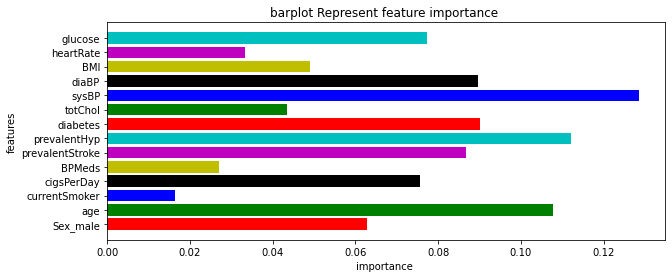

In [35]:
imp_feature = pd.DataFrame({'Feature': ['Sex_male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
plt.show()

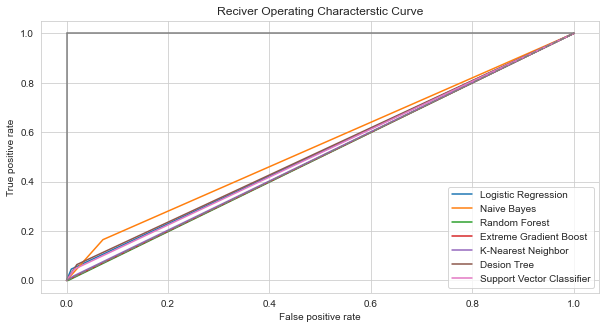

In [36]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# Model Evaluation

In [37]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,85.333333
1,Naive Bayes,81.733333
2,Random Forest,85.200000
3,Extreme Gradient Boost,85.466667
4,K-Nearest Neighbour,84.533333
5,Decision Tree,84.666667
6,Support Vector Machine,84.800000


As we can see, the results are very similar, but the most accurate once is Extreme Gradient Boost.

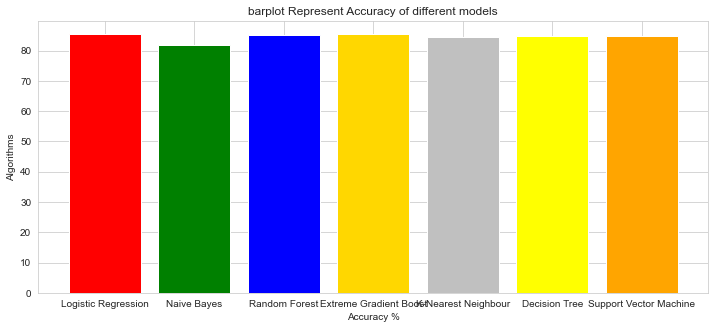

In [38]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

# Ensembling

In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.

In [39]:
!pip install mlxtend
scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

[21:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Asalah zarban\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Asalah zarban\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Asalah zarban\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:07:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confussion matrix
[[641   0]
 [109   0]]


Accuracy of StackingCVClassifier: 85.46666666666667 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       641
           1       0.00      0.00      0.00       109

    accuracy                           0.85       750
   macro avg       0.43      0.50      0.46       750
weighted avg       0.73      0.85      0.79       750



C:\Users\Asalah zarban\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asalah zarban\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asalah zarban\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conclusion

1) Extreme Gradient Boost gives the best Accuracy compared to other models.

2) Ensembling technique increase the accuracy of the model.

3) All attributes selected after the elimination process show Pvalues lower than 5% and thereby suggesting significant role in the Heart disease prediction.

4) Men seem to be more susceptible to heart disease than women.Increase in Age,number of cigarettes smoked per day and systolic Blood Pressure also show increasing odds of having heart disease.

5) Total cholesterol shows no significant change in the odds of CHD. This could be due to the presence of 'good cholesterol(HDL) in the total cholesterol reading.Glucose too causes a very negligible change in odds (0.2%)
